# Spotify clustering

The goal is to cluster the related songs together, and create the recommender algorithm. The dataset that contains the metadata for songs on the Spotify platform will be used.

## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import numpy as np

In [2]:
spotify_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


## Data Exploration

In [3]:
spotify_df.shape

(10000, 12)

In [4]:
# select the numeric features
spotify_numeric = spotify_df.select_dtypes(include="number")

In [5]:
spotify_numeric.shape

(10000, 10)

Check the distribution for the variables

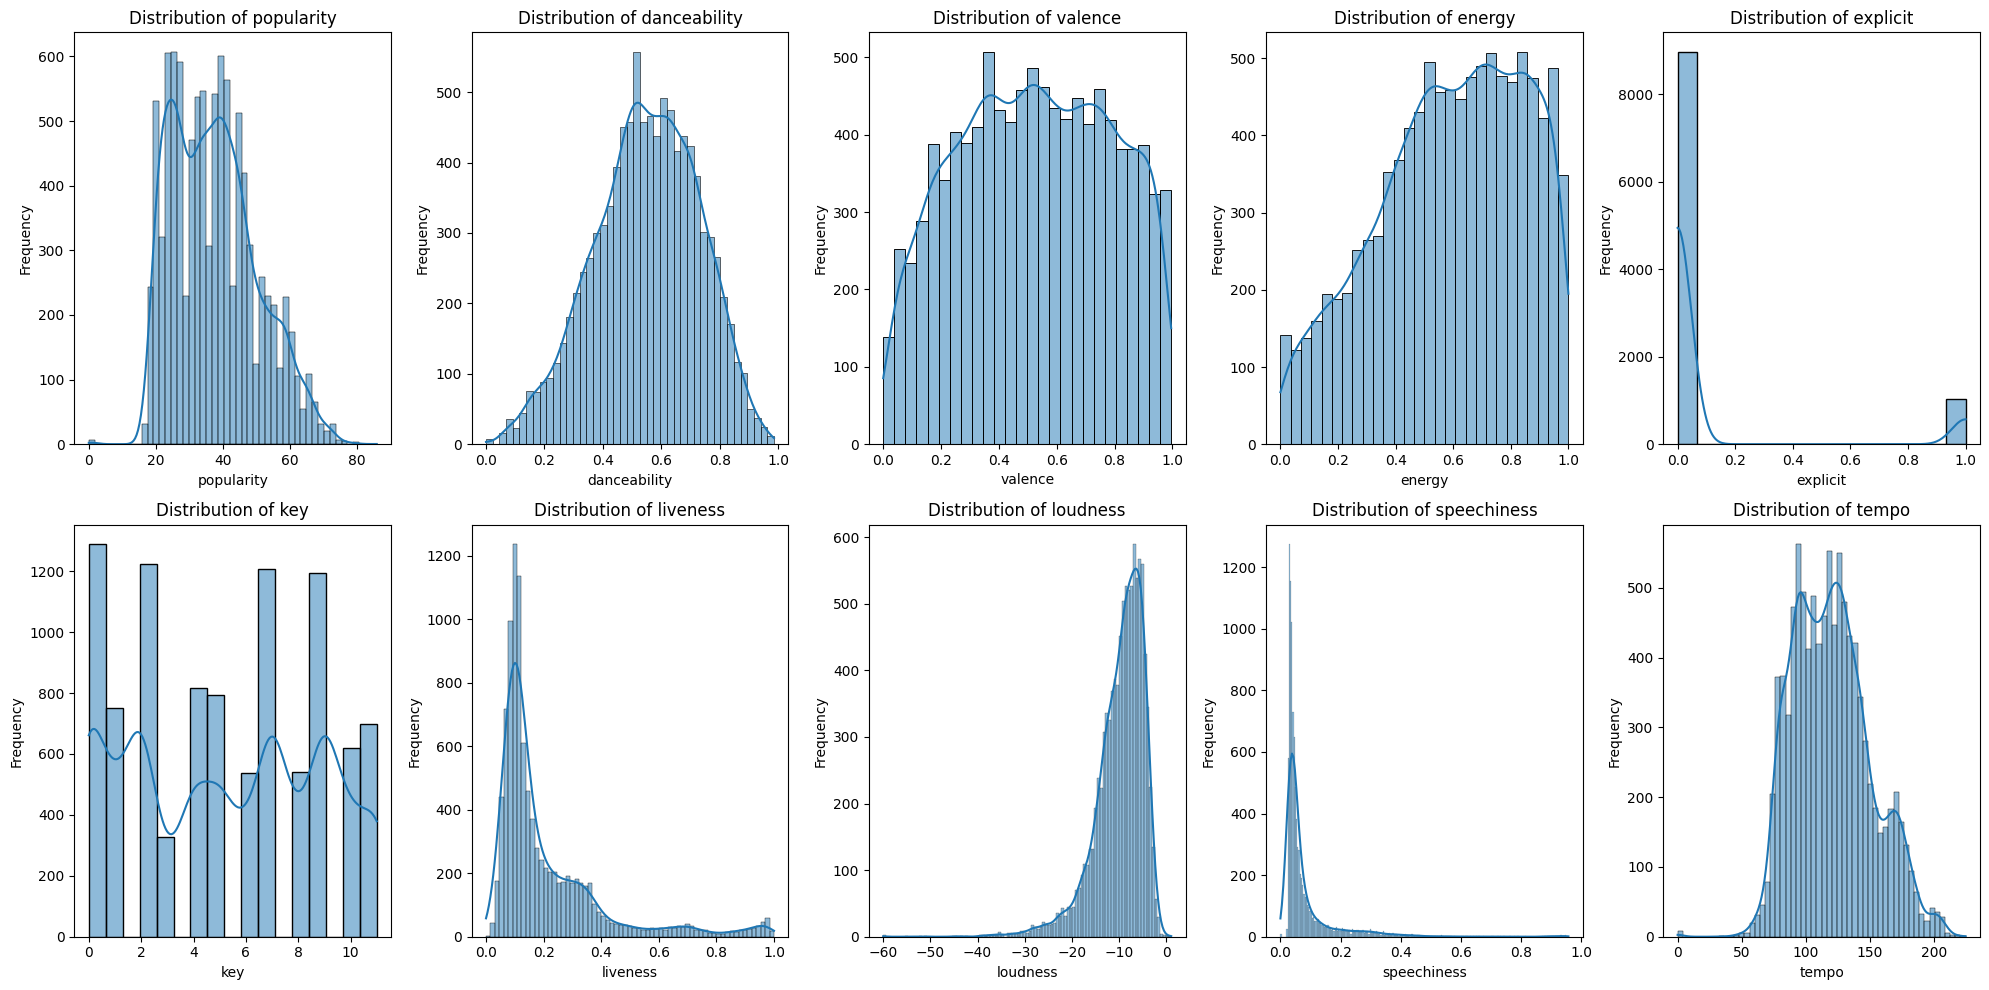

In [6]:
# List of variables to check
variables = spotify_numeric.columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each variable
for i, var in enumerate(variables):
    fig = sns.histplot(spotify_numeric[var], kde=True, ax=axes[i])
    fig.set_title(f'Distribution of {var}')
    fig.set_xlabel(var)
    fig.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Preprocessing

Scale the numeric features

In [7]:
std_scaler = RobustScaler().set_output(transform="pandas")

spotify_numeric_scaled = std_scaler.fit_transform(spotify_numeric)

Check how many clusters we should have using the elbow method


In [8]:
inertias=[]
n_k = range(1,10)

# loop for each element in a range
for k in n_k:
  # instantiate kmeans
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  # fit the model
  kmeans.fit(spotify_numeric_scaled)
  # calculate inertias
  inertias.append(kmeans.inertia_)

print(inertias)

[100388.99587726666, 63515.00771185539, 53838.78912411182, 46476.35767800149, 38652.906602603936, 35058.13752612527, 32595.639391092525, 30806.950410883706, 29355.536905147703]


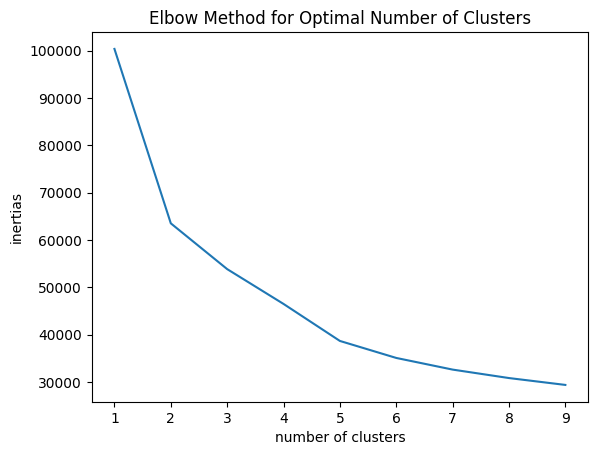

In [9]:
# plot the elbow method
fig = sns.lineplot(x=n_k, y=inertias)
fig.set_title("Elbow Method for Optimal Number of Clusters")
fig.set_ylabel("inertias")
fig.set_xlabel("number of clusters")

plt.show()

> Inflection point = 6 (optimal number of clusters)


## Modelling

Use KMeans algorithm to cluster the songs into 6 labels

In [10]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=0)

kmeans.fit(spotify_numeric_scaled)

KMeans(n_clusters=6, n_init=100, random_state=0)

Retrieve the score of the model = the total squared distance between each data point

In [11]:
kmeans.score(spotify_numeric_scaled)

-35057.78979538812

Save the labels for each data point

In [12]:
labels = kmeans.labels_
labels

array([0, 3, 0, ..., 0, 1, 2], dtype=int32)

Add these labels to the dataframe spotify_df

In [13]:
spotify_df["label"] = labels

In [14]:
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,0
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,3
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,0
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005,4
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,0


## Generating Spotify playlists based on the clusters

Generate 6 playlists (one for each cluster) that contains 5 random songs from that cluster.

In [15]:
# initialize the dictionary
daily_mixes = {}
# loop over unique cluster labels
for num_cluster in np.unique(labels):
  # filter the dataframe and append to the dictionary
  daily_mixes[num_cluster] = spotify_df[spotify_df['label'] == num_cluster]

In [16]:
for key,value in daily_mixes.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']].reset_index().drop(columns='index'))

--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
0,Blow Me Away - Featuring Valora,"['Breaking Benjamin', 'Valora']"
1,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna..."
2,Take Another Road,"['Jimmy Buffett', 'Elliot Scheiner']"
3,Shine,['Newsboys']
4,Backwards With Time,['The Avett Brothers']


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
0,2020 Freestyle,['Big Homie Prez']
1,White Punks on Hope,['Crass']
2,Gibberish,"['MAX', 'Hoodie Allen']"
3,Interlude,"['Lil Wayne', 'Tech N9ne']"
4,Kitty Kat,['Beyoncé']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
0,It Don't Mean a Thing (If You Ain't Got That S...,['Duke Ellington']
1,Money Bag,['Cardi B']
2,Satellites,['Kevin Gates']
3,Hey Joni (Album Version),['Sonic Youth']
4,El Estuche,['Aterciopelados']


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
0,The Bricklayer's Beautiful Daughter,['Will Ackerman']
1,"La Gioconda / Act 2: ""Cielo e mar!""","['Amilcare Ponchielli', 'Luciano Pavarotti', '..."
2,Summertime,"['Big Brother & The Holding Company', 'Janis J..."
3,Lux Aurumque,"['Eric Whitacre', 'Eric Whitacre Singers']"
4,Drift,"['Galimatias', 'Alina Baraz']"


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


,name,artists
0,"Blue - Live at Universal Amphitheatre, Los Ang...",['Joni Mitchell']
1,All This and Heaven Too,['Raymond Scott']
2,Something - Live at The Honolulu International...,['Elvis Presley']
3,Total Trash (Album Version),['Sonic Youth']
4,The Hobo Song,['Old & In The Way']


--------------------------------------------------
Here are some songs for playlist 5
--------------------------------------------------


,name,artists
0,Rachel,['Steven Wright']
1,(The Infamous Prelude),['Mobb Deep']
2,Ice,['Steven Wright']
3,Biting A Puppy,['Todd Glass']
4,"The Man, The Myth, The Legend - Interlude",['Juice WRLD']
